<a href="https://colab.research.google.com/github/MSoumen/Practice-With-TensorFlow/blob/master/CNN_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras as tk

In [0]:
model= tk.models.Sequential([tk.layers.Conv2D(filters=64, kernel_size=(4,4), activation='relu', input_shape=(28,28,1)),
                             tk.layers.MaxPooling2D(pool_size=(4,4)),
                             tk.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                             tk.layers.MaxPooling2D(pool_size=(2,2)),
                             tk.layers.Flatten(),
                             tk.layers.Dense(units=128, activation='relu'),
                             tk.layers.Dense(units=10, activation='softmax')])

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 25, 25, 64)        1088      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

# Improving MNIST using Convolutions

In [0]:
# import data
mnist= tk.datasets.fashion_mnist
(training_imgs,training_labels),(testing_imgs,testing_labels)= mnist.load_data()
train_data= training_imgs/255
test_data= testing_imgs/255

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# using DNN
model= tk.models.Sequential([
                             tk.layers.Flatten(),
                             tk.layers.Dense(128, activation=tf.nn.relu),
                             tk.layers.Dense(units=10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4987 - accuracy: 0.8252
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3757 - accuracy: 0.8652
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3365 - accuracy: 0.8774
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3135 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2971 - accuracy: 0.8897


In [0]:
model.evaluate(test_data, testing_labels)

313/313 [==============================] - 0s 2ms/step - loss: 0.3578 - accuracy: 0.8707


[0.3578115999698639, 0.8707000017166138]

# ** Using CNN **

In [0]:
# raeady Data
training_imgs= training_imgs.reshape(60000, 28,28,1)
train_data= training_imgs/255.0
testing_imgs= testing_imgs.reshape(10000, 28,28,1)
test_data= testing_imgs/255.0

In [0]:
model= tk.models.Sequential([
                             tk.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
                             tk.layers.MaxPooling2D(pool_size=(2,2)),
                             tk.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                             tk.layers.MaxPooling2D(pool_size=(2,2)),
                             tk.layers.Flatten(),
                             tk.layers.Dense(units=128, activation=tf.nn.relu),
                             tk.layers.Dense(10, tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(train_data, training_labels, epochs=5)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [0]:
# Evaluates
model.evaluate(test_data, testing_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2454 - accuracy: 0.9099


[0.24536263942718506, 0.9099000096321106]

# Visulizing Convolutional and Pooling

In [0]:
testing_labels[:100]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5,
       7, 9, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7,
       6, 7, 2, 1, 2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1,
       2, 3, 9, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
       0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2], dtype=uint8)

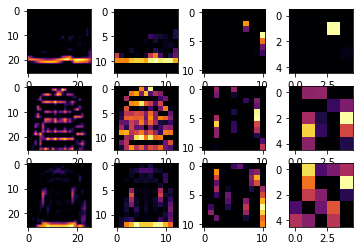

In [0]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_data[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_data[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_data[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

# Exercises

In [1]:
import tensorflow as tf
# import Data
mnist= tf.keras.datasets.mnist
(training_imgs, training_labels),(testing_imgs, testing_labels)= mnist.load_data()
print('Shape of Training Images: ', training_imgs.shape)
print('Shape of Training Labels: ', training_labels.shape)
print('Shape of Testing Images: ', testing_imgs.shape)
print('Shape of Testing Labels: ', testing_labels.shape)

11493376/11490434 [==============================] - 0s 0us/step
Shape of Training Images:  (60000, 28, 28)
Shape of Training Labels:  (60000,)
Shape of Testing Images:  (10000, 28, 28)
Shape of Testing Labels:  (10000,)


In [0]:
# Reshape and Scale Data
training_imgs= training_imgs.reshape(60000,28,28,1)
testing_imgs= testing_imgs.reshape(10000,28,28,1)

train_data= training_imgs/255.0  #pixel value range(0-255)
test_data= testing_imgs/255.0

In [24]:
# Make Model
model= tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
  # tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  # tf.keras.layers.MaxPooling2D(2,2),
  # tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
  # tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')

])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_data, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1356 - accuracy: 0.9599
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0473 - accuracy: 0.9858
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0294 - accuracy: 0.9906
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0195 - accuracy: 0.9938
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0135 - accuracy: 0.9954
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0087 - accuracy: 0.9971
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0072 - accuracy: 0.9975
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0064 - accuracy: 0.9980
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0049 - accuracy: 0.9982
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.004

In [25]:
model.summary()
model.evaluate(test_data, testing_labels)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 10816)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               1384576   
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 2ms/step - loss: 0.0570 - accuracy: 0.9872


[0.05704882740974426, 0.9872000217437744]

Here u can calculate the #Params using formule
 - (#input_nodes+1)* #output_nodes  (for Dense layers)
 - (

## Answer 1

Observation: 
 - At 16 filters(i.e:Convolution) the accuracy on train_data = 0.9982 and test_data= 0.9871
 - At 32 filter the accuracy on train_data= 0.9984 and test_data= 0.9826
 - At 64 filter the accuracy on train_data= 0.9983 and test_data= 0.9875

Here for this type of Data Convolution filter of 64 is best

## Answer 2

- With 2 Convolution layers having 64 filters accuracy on train_data= 0.9980 and test_data= 0.9730
- Removing final Convolution layer gives accuracy on train_data= 0.9991 and test_data= 0.9870

## Answer 3

- Adding more Conv2D(upto 3) gives accuracy on train_data= 0.9898 and test_data= 0.9825

## Answer 4

- removing all Conv2D not 1st will give accuracy on train_data= 0.9985 and test_data= 0.9872

## Answer 5


In [30]:
class myCallBacks(tf.keras.callbacks.Callback):
  def when_epoch_ends(self, epoch, logs={}):
    if(logs.get('acc') > ACCU_THRESHOLD):
      print('Reached %2.2f%% accuracy, So stopped Training !'%(ACCU_THRESHOLD*100))
      self.model.stop_training= True

calllbacks= myCallBacks()


model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ACCU_THRESHOLD=0.98
model.fit(train_data, training_labels, epochs=10, callbacks=[calllbacks])
model.evaluate(test_data, testing_labels)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1495 - accuracy: 0.9560
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0509 - accuracy: 0.9843
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0320 - accuracy: 0.9899
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0205 - accuracy: 0.9937
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0140 - accuracy: 0.9955
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0116 - accuracy: 0.9962
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0079 - accuracy: 0.9974
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0065 - accuracy: 0.9976
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0052 - accuracy: 0.9986
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0451 

[0.04512358456850052, 0.9883000254631042]

Here implementing a callBack is not supposed to help me.... 